<h1>Clustering Algorithms</h1>
<h3>Unsupervised learning</h3>
In unsupervised learning, we do something slightly different.
We say, all right, here's our space of independent variables.
Now try and see the many features that we have.
And now try and see what values of these features
will make subsets of these cases closer together
by some estimate.
OK, how do they fit closer together?
<ul>
<li>The algorithm tries to group similar data together (clusters) using the values of the feature space.</li>

You can think of having a vast--
data points sitting all over the place.
And you want to find planes that cut through the space, that can
group these data points together in a similar way.
OK, they're called clusters.
And they use only value the feature space.
Of course, what we do is we, again,
work our way through a training and testing sample.
And in the training sample, we give it
the independent variables, and it groups them.
And then we want to measure how well that's
done by looking whether these groups map
onto something in the real world that makes sense to us, right.
So, for example, we could take physical characteristics
of people and say, can we differentiate
between these physical characteristics
and put them into two groups?
If we put them into two groups, maybe we
can figure out men versus women, something like that.
But we don't say that this case corresponds
to a man or this set of features corresponds to women.
We let the algorithm use the features to differentiate
between the two groups of people.
</ul>
<h3>K-Means Clusterng</h3>

A popular algorithm for doing clustering
is __K-means clustering__, what it does
is it partitions the dataspace into clusters.
And it minimizes the distance between the mean of a cluster
and the data points.

So every data point is sitting in n-dimensional space, where
__each dimension is a feature__.
And so you can measure the distance between one data
point and another data point.
And we want to find clusters where
the __mean distance between data points in each cluster
is minimal__.

So we want to minimize that distance.
And what you need to know in advance
is how many clusters you're going to have in your data
set, in your domain, right.
Like, if you're doing men versus women, you have two clusters.
You know that.
Tou can't say _find me the number of clusters in that case_.
You need to actually tell the K-means algorithm
how many clusters to use.

<ul>
<li>partitions the dataspace into clusters
<li>minimizes distance between the mean of a cluster and the data points
<li>the desired number of clusters must be known in advance
</ul>

<h2>Image recognition dataset</h2>
<ul>
<li>Digits 0-9 pixelated into 64 quadrants
<li>Each value represents the area that is shaded


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

In [2]:
digits = load_digits()
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [6]:
type(digits)

sklearn.datasets.base.Bunch

In [7]:
for item in digits:
    print(item)

data
target
target_names
images
DESCR


In [9]:
len(digits.data)

1797

In [10]:
digits.data[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [11]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [12]:
len(digits.target)

1797

In [13]:
digits.target[10]

0

In [14]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Scale the data to normal distribution

[Standardization of datasets](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler) is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

The function scale provides a quick and easy way to perform this operation on a single array-like dataset:

In [15]:
data = scale(digits.data)
data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ..., 
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

#### Scaled data has zero mean and unit variance:

In [16]:
data.mean(axis=0)

array([  0.00000000e+00,  -2.56086502e-16,  -2.34771702e-16,
        -3.05326777e-16,   1.39689163e-16,  -3.16941798e-16,
        -9.59598443e-16,   6.06946633e-16,  -4.62368967e-16,
         7.55084971e-17,  -5.33796713e-17,   5.71483749e-17,
         4.52862258e-17,  -1.49512505e-17,   8.96580775e-16,
        -2.17719863e-16,  -6.87973761e-16,  -7.70421876e-17,
         2.59978769e-16,   2.32547550e-16,   1.05878949e-16,
        -1.40863021e-16,  -1.15408826e-16,  -2.26477465e-16,
         4.51109193e-16,   3.79341646e-17,  -7.71657517e-17,
        -9.60092699e-17,  -8.72980041e-17,  -1.50624582e-16,
        -1.05597840e-15,  -2.52140175e-16,   0.00000000e+00,
         3.42148865e-16,   1.21710593e-16,  -1.07871419e-16,
        -2.00606242e-16,  -1.09354188e-17,  -7.12964591e-17,
         0.00000000e+00,   3.00716294e-16,  -1.74657790e-16,
         4.03436636e-16,   1.92111213e-16,   2.61337974e-17,
         5.38739275e-17,   4.71396866e-17,   8.63759074e-16,
         2.62048467e-16,

In [17]:
data.std(axis=0)

array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

### Render the digit images and their associated values

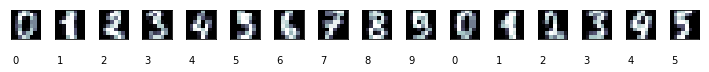

In [254]:
def print_digits(images,y,max_n=16):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1,
           hspace=.05, wspace=.5)
    i = 0
    while i < max_n and i < digits.images.shape[0]:
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        # label the image with the target value
        p.text(0, 14, str(y[i]))
        i = i + 1
print_digits(digits.images, digits.target, max_n=16)

### Training and testing samples

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally.

In scikit-learn a random split into training and test sets can be quickly computed with the [train_test_split](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) helper function.
<img src='scexamp1.png'>

In [243]:
from sklearn.model_selection import train_test_split

X_train,
X_test,
y_train,
y_test,
images_train,
images_test = train_test_split(data,
                               digits.target,
                               digits.images,
                               test_size=0.25,
                               random_state=42)

n_samples,n_features = X_train.shape
n_digits = len(np.unique(y_train))
labels = y_train

len(np.unique(y_train))

10

### Create the model and fit the data

And the last thing we do, which we do always
is always the same thing, is we import the cluster algorithm--
the cluster library, a module, and create a k-means clustering
algorithm from that.

We tell it to initialize it by doing some initialization
stuff.
So what it-- k-means works better when you initialize it,
so we initialize it initially.
We run this pre-algorithm, you can think of,
to do the initialization.
And to start with a-- well, what k-means does
is it starts by randomly allocating the digits, right?
So it'll say, all right, I need 10 categories,
and that's the number of clusters, 10.
And it'll randomly assign the data to 10 categories.
But if you can sort of intelligently
start off and use some knowledge about the data,
like maybe the means inside the values, all that kind of stuff,
then you're better off.
So you can use this __k-means-plus-plus__ to actually start the algorithm at a better point.
And so that's the k-means.

The [__KMeans__](http://scikit-learn.org/stable/modules/clustering.html#k-means) algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

__The k-means algorithm divides a set of N samples X into K disjoint clusters C__, each described by the mean _mu-j_ of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from X, although they live in the same space. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion

In [244]:
from sklearn import cluster
clf = cluster.KMeans(init='k-means++',n_clusters=10,random_state=42)

k-means++ runs an initializer before using the k-means algorithm

In [245]:
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [246]:
#images_train

## Call print_digits with training images, and computed labels
### Returned labels are cluster numbers

So we've written our model so our model now has predictions
on--
not predictions, but really it's assigned
cluster numbers, to groups of to each individual data points.
So we've told our model to make 10 clusters.
So it's assigned 10 cluster numbers 0, 1, 2, to 9,
to each individual data point.
And those numbers are in this CLF, as our model,
in this attribute called Labels_._

So what we're going to do now is we're
going to take a look at our training data set
and look at the first 20 cases, and see what cluster numbers
were assigned to each case.
And we'll look at the actual image itself.

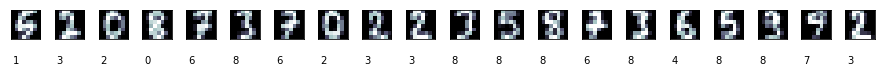

In [247]:
print_digits(images_train,clf.labels_,max_n=20)

So what we want to do then is, we
want to use the test sample now to generate predictions.
So we've got our training sample.
We've trained our model to differentiate
among these things by looking at data points.
And now we give it the testing sample.
And it's going to use the feature values and the trained
clustering that we did before to predict
which cluster things belong to.


In [248]:
y_pred=clf.predict(X_test)
#y_pred

In [257]:
def print_cluster(images,y_pred,cluster_number):
    img=[]
    lbl=[]
    for i in range(len(images)):
        if y_pred[i]==cluster_number:
            img.append(images[i])
            lbl.append(y_pred[i])
#    images=images[y_pred==cluster_number]
#    y_pred = y_pred[y_pred==cluster_number]
    print_digits(img,lbl,max_n=6)
    

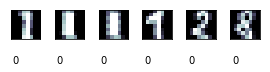

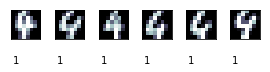

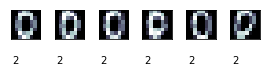

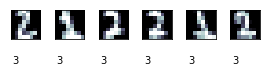

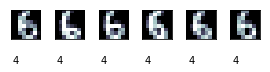

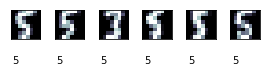

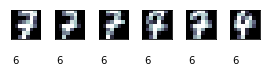

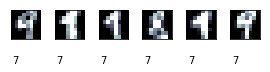

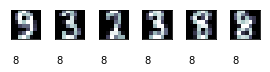

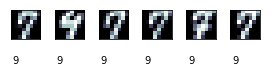

In [258]:

for k in range(10):
    print_cluster(images_test[5],y_pred,k)

<h1>Evaluating the model</h1>

So let's evaluate the model.
For evaluating the model, we use something called __Adjusted Rand
Index__.
It's a measure of the __similarity between two groups__.

So the goal here is to-- we have a group
of actual test data, that is the actual numbers that we have.
So we know that each case in our dataset,
we know what the number is.
We know whether it's a 1, or a 2, or a 3.
And we also have the predictions.
That's what our model is predicting.
And we want to see what's the similarity between these two
sets.
Are they reasonably similar?
We don't look at actual values.
We're seeing whether the differentiation is similar
or not.

So if it's 0.0, then there's no similarity at all.
And it's completely random, any overlap in that.
And 1.0 indicates that the two groups are identical.

<li>Adjusted rand index: A measure of the similarity between two groups</li>
<li>We'll use it to see how similar the y_test actuals and predicted groupings are</li>
<li>http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html</li>
<li>0.0 indicates that there is no similarity and any overlap is explainable as totally random</li>
<li>1.0 indicates that the two groups are identical</li>

In [259]:
from sklearn import metrics

print("Adjusted rand score: {0:2}".
      format(metrics.adjusted_rand_score(y_test, y_pred)))

Adjusted rand score: 0.5674467844660916


<h2>Confusion matrix</h2>

So what this _confusion matrix_ is doing is,
we have a cluster number and actual prediction.
So what this does is, each row in this corresponds
to a number in the test sample.
So each role is--
so this is Row 0 in the test sample.
And each column is the cluster assigned to that case
by the model.
So what this is saying is that for our actual 0s, none of them
were put in Cluster 0.
None of them were put in Cluster 1, so none of them
into Cluster 0, none of them into Cluster 1.
43 were assigned to Cluster 2, and none of them
into any other clusters.
So if you're looking at 0s, we've
done a great job of identifying them.
If we get a Cluster 2, we are reasonably
confident that it's a 0.
Let me rephrase that.
If our model is saying it's 0, then it's
going to put it inside Cluster 2.
So that's a great number.
That's our testing sample.
It's not the training sample.
Can it tell us confidently the other way?
Well, almost, because if we find that we have Cluster 2, then
the only case in Cluster 2 that's not identified as 0,
is this one here, which is 0, 1, 2, 3, 4, 5 6.
In one case, it took a 6 that was actually a 6,
and identified it as a-- put it in Cluster 2, which is a 0.
So with 0s, we've done a very good job.
So given a 0, we can, with reasonable confidence--
and Cluster Number 2-- we can, with extreme confidence,
actually, say, hey, that's a 0.

<li>Each row corresponds to a number (y_test)
<li>Each column to y_pred (the cluster number)
<li>Data is the number of times y_test was assigned to the corresponding y_pred
<li>For example, 0 is fully assigned to cluster 2 (Row 0, Column 2)
<li>8 is assigned to cluster 0  21 times (Row 8, Column 0)
<li>7, which is cluster 6 is assigned to cluster 6 34 times (Row 7, Column 6)


In [260]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]


Let's look at this one.
So that's-- let's look at this one here.
There's 0, 1, 2, 3.
Let's look at a 3.
So the 3-- if this is the row for 3s--
so 3s get assigned to Cluster 0 in one case, Cluster 3 in one
case, and so on, and so forth, but Cluster 8 in 39 cases.
So in 39 cases, we're getting a 3 in Cluster 8.
And in 4 plus 1, 5 plus 1, 6 plus 1, 7 cases,
we're getting a 3 in some other cluster.
So again, that means that we have a precision, essentially,
of up 39 divided by 39 plus whatever the denominator is--
4, 5, 6, 7.

However, if you look at the other way around,
and we look at the column-- that is Column Number 8 over here--
we find that in Column 8, in Cluster 8, 39 of them are 3s.
But one is a 2, 16 are 5s, 11 are 8, and 40 are 9s.
So if given that we get a cluster value of 8
for a figure, can we with confidence say it's a 3?
Not really, because we have so many cases where it
could be a 9 or it could be 8.
In fact, there are more 9s than there are 3s in that cluster.
So that's done a very poor job of identifying
the cluster correctly.

So this is what do you want to do with a confusion matrix.
You want to see how well it's actually figured
out the clusters themselves.
So you look at this stuff, and you can then
decide for each digit how well it's been doing,
maybe try to get more data or higher pixel rate,
higher resolution, before you actually work and say,
hey, maybe we get a better bet.

But we can see our 56% Rand score is coming from the fact
that we are doing well on some numbers.
We're doing well on 0.
We're probably doing well on 0, 1, 2, 3, 4.
Yep, we're doing well on 4, because 4,
we have 0, 1, 2, 3, 4, 50 cases that are in Cluster 1.
Here, 50 cases in Cluster 1, and only 2 plus 1, 3 plus 1,
4 cases that are--
5 cases, actually, that are in other clusters.
And even more important, Cluster 1
doesn't contain anything except 4s.
So if you get a Cluster 1, you can say, hey, that's a 4,
even though you may not recognize every 4 correctly.

So that's how you sort of analyze
the results of your clustering analysis
and looking at this confusion matrix.

## Graphical view of the clusters¶
<li>First reduce the x dimensions to 2 using principle component analysis PCA</li>

[PCA](http://scikit-learn.org/stable/modules/decomposition.html#pca) is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. In scikit-learn, PCA is implemented as a transformer object that learns n components in its fit method, and can be used on new data to project it on these components.

The optional parameter whiten=True makes it possible to project the data onto the singular space while scaling each component to unit variance. This is often useful if the models down-stream make strong assumptions on the isotropy of the signal: this is for example the case for Support Vector Machines with the RBF kernel and the K-Means clustering algorithm.

<li>https://en.wikipedia.org/wiki/Principal_component_analysis</li>
<li>Then figure out the range of values and define the grid</li>
<li>Run k-means on the reduced (2 component) data set</li>
<li>Draw a color map and plot the pca points on this map</li>
<li>Find the cluster centroids and plot them on the color map</li>


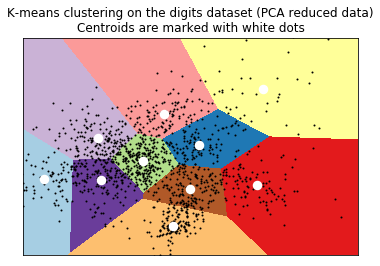

In [261]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2).fit(X_train)
reduced_X_train = pca.transform(X_train)
# Step size of the mesh. 
h = .01     
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = reduced_X_train[:, 0].min() + 1, reduced_X_train[:, 0].max() - 1
y_min, y_max = reduced_X_train[:, 1].min() + 1, reduced_X_train[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
    np.arange(y_min, y_max, h))
kmeans = cluster.KMeans(init='k-means++', n_clusters=n_digits, 
    n_init=10)
kmeans.fit(reduced_X_train)
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')
plt.plot(reduced_X_train[:, 0], reduced_X_train[:, 1], 'k.', 
    markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],marker='.', 
    s=169, linewidths=3, color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA reduced data)\nCentroids are marked with white dots')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()